In [2]:
import pandas as pd
import numpy as np

### Wczytanie danych

In [3]:
sets=pd.read_csv('sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [4]:
themes=pd.read_csv('themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [5]:
inv_parts=pd.read_csv('inventory_parts.csv')
inv_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,False,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,False,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,False,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,False,NaN
4,1,stickerupn0077,9999,1,False,NaN


In [6]:
colors=pd.read_csv('colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


### Sprawdzamy Typy Danych

In [7]:
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [8]:
inv_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare          bool
img_url         object
dtype: object

In [9]:
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [10]:
colors.dtypes

id           int64
name        object
rgb         object
is_trans      bool
dtype: object

### Sprawdzamy obecność wartości NULL

In [11]:
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

In [12]:
inv_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         7040
dtype: int64

In [13]:
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

In [14]:
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

### Sprawdzamy informacje na temat rozmiarów tabel

In [15]:
sets.shape

(24302, 6)

In [16]:
themes.shape

(469, 3)

In [17]:
inv_parts.shape

(1302124, 6)

In [18]:
colors.shape

(267, 4)

In [19]:
sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts', 'img_url'], dtype='object')

In [20]:
len(sets.columns)

6

In [21]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    24302 non-null  object
 1   name       24302 non-null  object
 2   year       24302 non-null  int64 
 3   theme_id   24302 non-null  int64 
 4   num_parts  24302 non-null  int64 
 5   img_url    24302 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [22]:
inv_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302124 entries, 0 to 1302123
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1302124 non-null  int64 
 1   part_num      1302124 non-null  object
 2   color_id      1302124 non-null  int64 
 3   quantity      1302124 non-null  int64 
 4   is_spare      1302124 non-null  bool  
 5   img_url       1295084 non-null  object
dtypes: bool(1), int64(3), object(2)
memory usage: 50.9+ MB


In [23]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        267 non-null    int64 
 1   name      267 non-null    object
 2   rgb       267 non-null    object
 3   is_trans  267 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 6.6+ KB


In [24]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         469 non-null    int64  
 1   name       469 non-null    object 
 2   parent_id  325 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


## Łączenie dwóch zbiorów danych

In [25]:
sets_themes = pd.merge(sets, themes, 
                     how='left',
                     left_on='theme_id',
                     right_on='id',
                     suffixes=('_sets','_themes')
                    )

In [26]:
sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,img_url,id,name_themes,parent_id
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,761,Activity Books with LEGO Parts,497.0
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,756,Samsonite,365.0
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,67,Classic Town,50.0
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,199,Lion Knights,186.0
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,143,Supplemental,126.0


In [27]:
#sets.head()

In [28]:
#themes.head()

In [29]:
#pd.merge?

## PCA test (algorytm działa, ale musimy dobrać sensowne dane do wnioskowania)

### Step 0: Pobranie i uporządkowanie danych

In [30]:
import pandas as pd

In [31]:

# Wczytanie plików CSV
inventories = pd.read_csv("inventories.csv")
inventory_sets = pd.read_csv("inventory_sets.csv")
sets = pd.read_csv("sets.csv")
themes = pd.read_csv("themes.csv")
inventory_minifigs = pd.read_csv("inventory_minifigs.csv")
inventory_parts = pd.read_csv("inventory_parts.csv")

# Połączenie tabel dla zestawów
# Łączenie zestawów z tematami
sets_themes = pd.merge(sets, themes, left_on="theme_id", right_on="id", suffixes=("_set", "_theme"))

# Dodanie inwentarzy do zestawów
sets_inventories = pd.merge(sets_themes, inventories, left_on="set_num", right_on="set_num", suffixes=("", "_inventory"))

# Liczba minifigurek
minifigs_per_set = pd.merge(sets_inventories, inventory_minifigs, left_on="id_inventory", right_on="inventory_id", how="left")
minifigs_per_set = minifigs_per_set.groupby(["theme_id", "name_theme", "set_num", "year"]).agg(
    total_minifigs=("quantity", "sum")
).reset_index()

# Ogólna liczba elementów
parts_per_set = pd.merge(sets_inventories, inventory_parts, left_on="id_inventory", right_on="inventory_id", how="left")
total_elements_per_set = parts_per_set.groupby(["theme_id", "name_theme", "set_num", "year"]).agg(
    total_elements=("quantity", "sum")
).reset_index()

# Liczba unikalnych elementów
unique_elements_per_set = parts_per_set.groupby(["theme_id", "name_theme", "set_num", "year"]).agg(
    unique_elements=("part_num", "nunique")
).reset_index()

# Połączenie danych
final_data = pd.merge(minifigs_per_set, total_elements_per_set, on=["theme_id", "name_theme", "set_num", "year"], how="outer")
final_data = pd.merge(final_data, unique_elements_per_set, on=["theme_id", "name_theme", "set_num", "year"], how="outer")

# Uzupełnienie brakujących wartości zerami
final_data = final_data.fillna(0)

# Wynikowa tabela
final_data.head()

,theme_id,name_theme,set_num,year,total_minifigs,total_elements,unique_elements
0,1,Technic,1030-1,1985,0.0,210.0,66
1,1,Technic,1038-1,1985,0.0,120.0,40
2,1,Technic,1039-1,1986,0.0,39.0,9
3,1,Technic,1237-1,2001,0.0,56.0,20
4,1,Technic,1257-1,1999,0.0,33.0,16


In [32]:
# Usunięcie niepotrzebnych kolumn
final_data = final_data.drop(columns=["set_num", "theme_id"])

# Wynikowa tabela
final_data.head()



,name_theme,year,total_minifigs,total_elements,unique_elements
0,Technic,1985,0.0,210.0,66
1,Technic,1985,0.0,120.0,40
2,Technic,1986,0.0,39.0,9
3,Technic,2001,0.0,56.0,20
4,Technic,1999,0.0,33.0,16


różna od zero ilość minifigs

In [33]:
# Filtr zestawów z ilością minifigurek != 0
sets_with_minifigs = final_data[final_data['total_minifigs'] > 0]

# Liczba takich zestawów
#num_sets_with_minifigs = sets_with_minifigs['set_num'].nunique()
sets_with_minifigs

,name_theme,year,total_minifigs,total_elements,unique_elements
245,Technic,1997,1.0,138.0,49
246,Technic,1996,1.0,129.0,49
247,Technic,1995,2.0,188.0,50
249,Technic,1997,1.0,186.0,57
250,Technic,1996,2.0,346.0,57
...,...,...,...,...,...
24291,Dungeons & Dragons,2024,1.0,3.0,3
24292,Dungeons & Dragons,2024,1.0,2.0,2
24293,Dungeons & Dragons,2024,1.0,4.0,4
24294,Dungeons & Dragons,2024,1.0,5.0,4


### Step 1: Load data

In [34]:
df = final_data

In [35]:
df

,name_theme,year,total_minifigs,total_elements,unique_elements
0,Technic,1985,0.0,210.0,66
1,Technic,1985,0.0,120.0,40
2,Technic,1986,0.0,39.0,9
3,Technic,2001,0.0,56.0,20
4,Technic,1999,0.0,33.0,16
...,...,...,...,...,...
24297,Botanicals,2025,0.0,0.0,0
24298,Botanicals,2025,0.0,0.0,0
24299,Botanicals,2025,0.0,0.0,0
24300,Botanicals,2025,0.0,0.0,0


### Step 2: Standardize the Data

In [36]:
from sklearn.preprocessing import StandardScaler
features = ['year', 'total_minifigs', 'total_elements', 'unique_elements']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
target = "name_theme"
y = df.loc[:,[target]].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

### Step 3: PCA Projection to 2D

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)

### Step 4: Visualize 2D Projection

#### Wersja dla wszystkich nazw (nic się nie dowiemy)

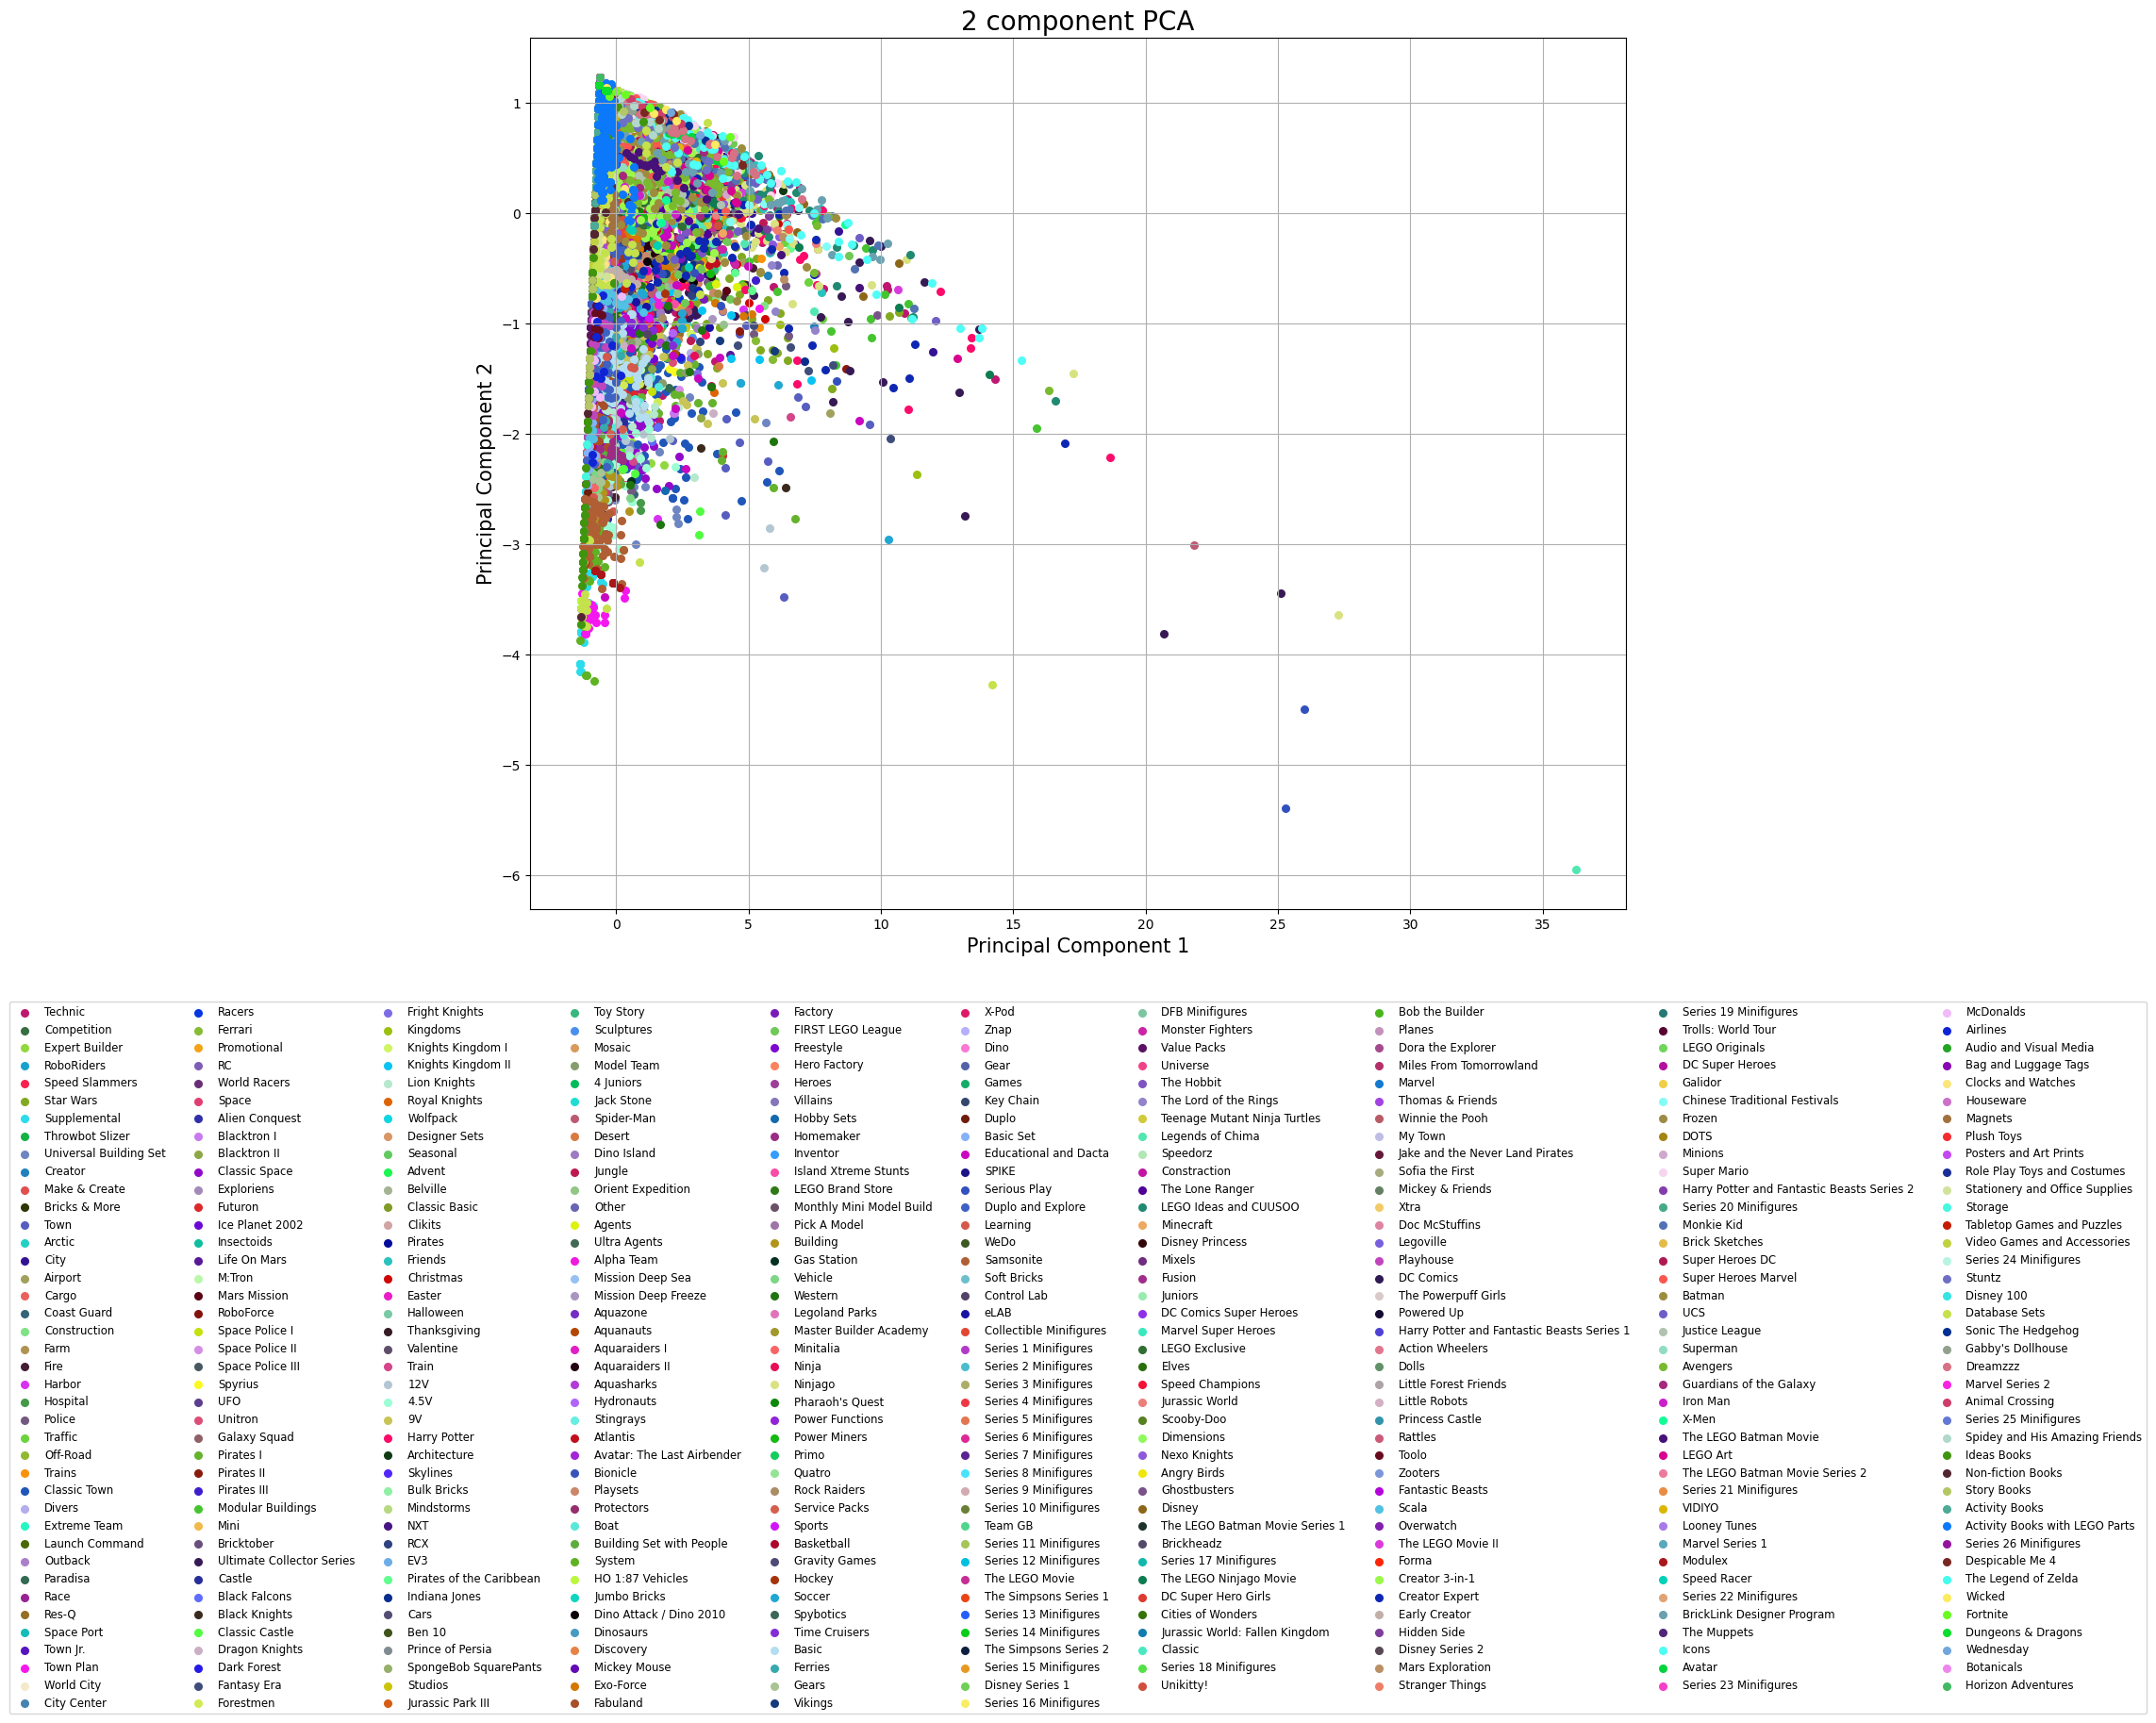

In [39]:
import random
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Generowanie losowych kolorów dla każdego unikalnego tematu
unique_targets = finalDf['name_theme'].unique()
random_colors = {theme: [random.random() for _ in range(3)] for theme in unique_targets}

# Tworzenie wykresu
for theme, color in random_colors.items():
    indicesToKeep = finalDf['name_theme'] == theme
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=[color],
               s=30,
               label=theme)

# Umieszczanie legendy pod wykresem
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=10)
ax.grid()

plt.show()

#### Wybranie top 5 najczęstszych nazw tematycznych

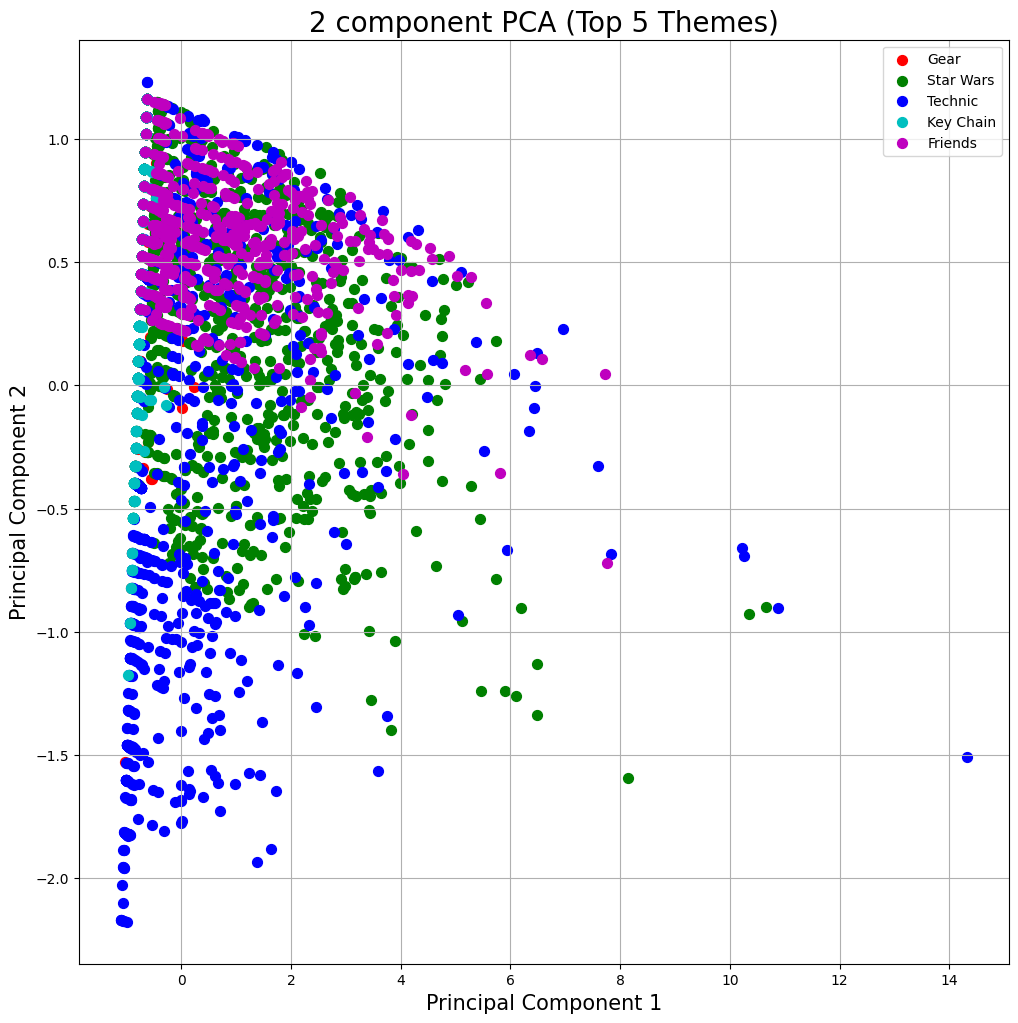

In [40]:
# Wybranie top 5 najczęstszych nazw tematycznych
top_themes = finalDf['name_theme'].value_counts().head(5).index

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA (Top 5 Themes)', fontsize=20)

colors = ['r', 'g', 'b', 'c', 'm']  # Kolory dla wybranych tematów
for theme, color in zip(top_themes, colors):
    indicesToKeep = finalDf['name_theme'] == theme
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=theme)

ax.legend(top_themes, loc='best')
ax.grid()
plt.show()

In [41]:
pca.explained_variance_ratio_

array([0.54205251, 0.24476701])

Nasze PC1+PC2 zawierają 0.78 informacji więc całkiem sporo straciliśmy

---------

In [44]:
#!pip install seaborn

In [47]:
#!pip install adjustText

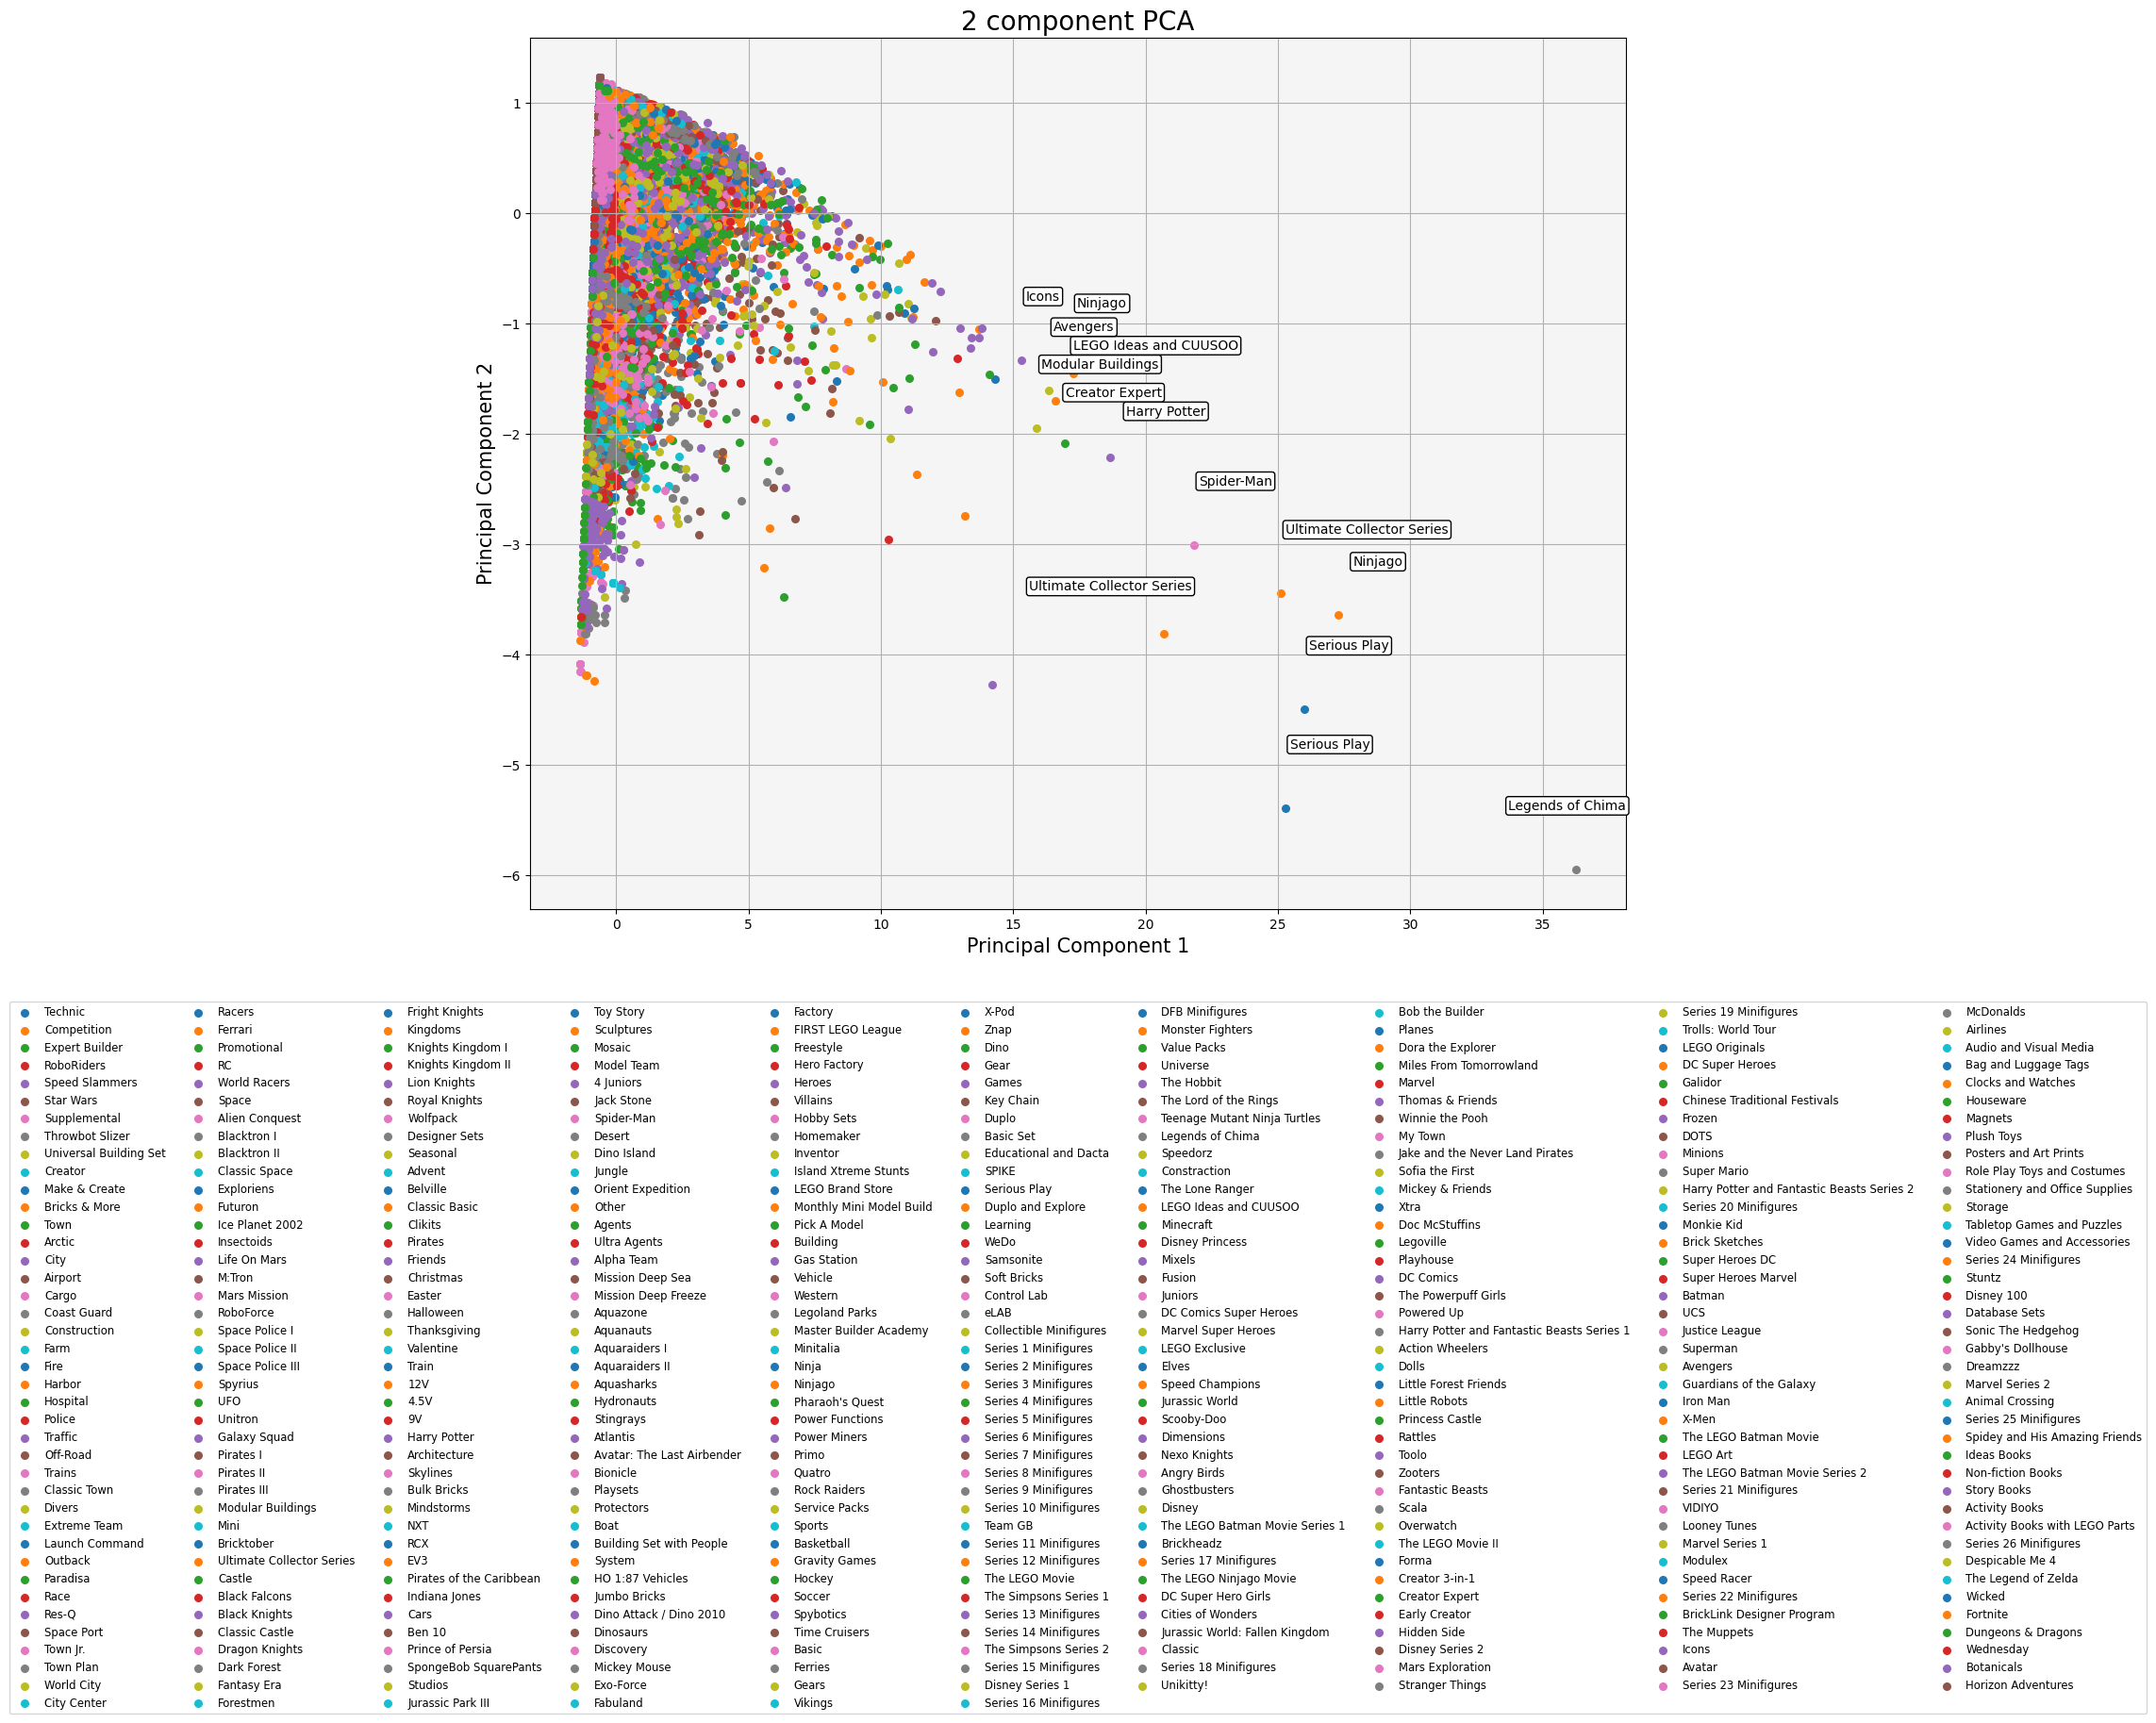

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Przygotowanie wykresu
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Wybór palety kolorów
palette = sns.color_palette('tab10', n_colors=len(finalDf['name_theme'].unique()))
color_map = {theme: palette[i] for i, theme in enumerate(finalDf['name_theme'].unique())}

# Tworzenie wykresu z użyciem zdefiniowanej palety kolorów
texts = []
for theme, color in color_map.items():
    indicesToKeep = finalDf['name_theme'] == theme
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=[color],
               s=30,
               label=theme)

    # Oznaczenie punktów odbiegających dla danego tematu
    outliers = finalDf.loc[indicesToKeep & (finalDf['principal component 1'] > 15)]
    for idx, row in outliers.iterrows():
        texts.append(ax.annotate(row['name_theme'],
                                 (row['principal component 1'], row['principal component 2']),
                                 xytext=(row['principal component 1'] + 0.5, row['principal component 2'] + 0.5),
                                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'),
                                 ha='center'))

# Dodanie legendy i siatki
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=10)
ax.grid()
ax.set_facecolor((0.96, 0.96, 0.96))

# Automatyczne dopasowanie tekstu
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, autoalign='x')

# Wyświetlenie wykresu
plt.show()


Widzimy odbiegające od norm motywy lego względem PC1,PC2 (zredukowanych featersów czyli ilości figórek, elementów, unikalnych figórek oraz roku wydania)

## Czy obecnie produkowane zestawy mają większą liczbę klocków niż w latach 2000-2009?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Załadowanie danych tylko z pliku sets.csv
sets = pd.read_csv("sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [3]:
# Filtrowanie danych na podstawie okresów: 2000-2009 i 2010-obecnie
sets = sets[['set_num', 'year', 'num_parts']] # ograniczenie się do użytecznych informacji

sets_2000_2009 = sets[(sets['year'] >= 2000) & (sets['year'] <= 2009)]
sets_2010_2024 = sets[sets['year'] >= 2010]

In [4]:
# Obliczenie średniej liczby części
avg_parts_2000_2009 = sets_2000_2009['num_parts'].mean()
avg_parts_2010_2024 = sets_2010_2024['num_parts'].mean()

print(f"Średnia liczba części (2000-2009): {avg_parts_2000_2009}")
print(f"Średnia liczba części (2010-2024): {avg_parts_2010_2024}")


Średnia liczba części (2000-2009): 139.18254301300883
Średnia liczba części (2010-2024): 185.7098599137931


In [5]:
# Przygotowanie danych do wizualizacji
visual_data = pd.DataFrame({
    "Period": ["2000-2009", "2010-2024"],
    "Average Parts": [avg_parts_2000_2009, avg_parts_2010_2024]
})

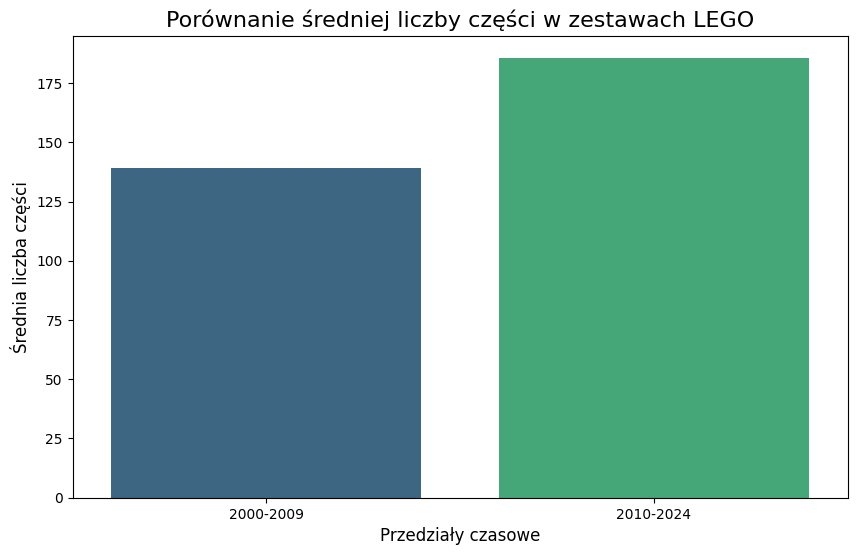

In [6]:
# Wykres słupkowy
plt.figure(figsize=(10, 6))
sns.barplot(x="Period", y="Average Parts", hue="Period", data=visual_data, palette="viridis", dodge=False, legend=False)
plt.title("Porównanie średniej liczby części w zestawach LEGO", fontsize=16)
plt.ylabel("Średnia liczba części", fontsize=12)
plt.xlabel("Przedziały czasowe", fontsize=12)
plt.show()

- Średnia liczba części w zestawach LEGO w latach 2000–2009 wynosi: **139,18**.
- Średnia liczba części w zestawach LEGO od 2010 roku do chwili obecnej wynosi: **185,71**.
- Wzrost średniej liczby części wynosi: 46.53 (części), co oznacza wzrost o około **33.4%**.

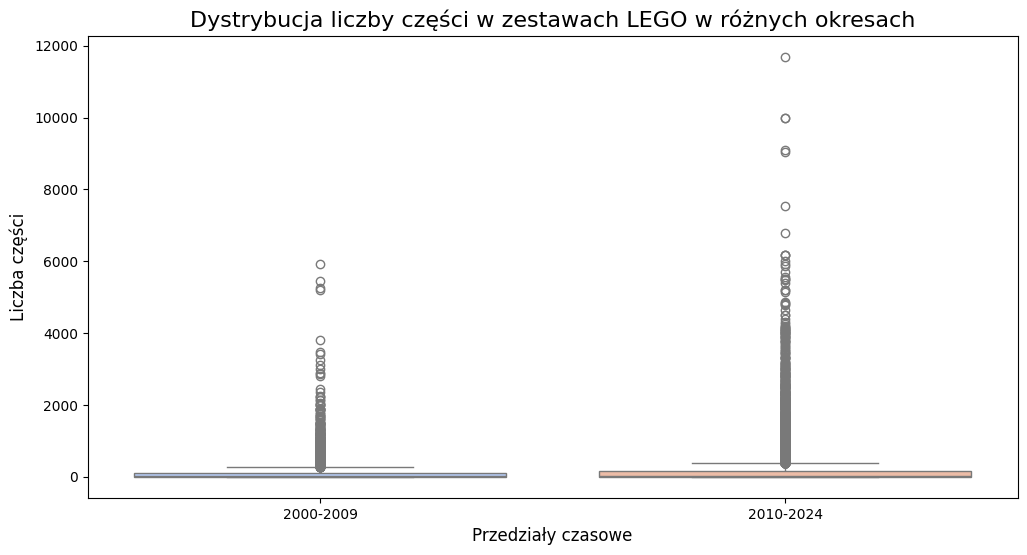

In [7]:
# Wykres pudełkowy dla dystrybucji
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=pd.cut(sets['year'], bins=[1999, 2009, 2024], labels=["2000-2009", "2010-2024"]),
    y=sets['num_parts'],
    hue=pd.cut(sets['year'], bins=[1999, 2009, 2024], labels=["2000-2009", "2010-2024"]),
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.title("Dystrybucja liczby części w zestawach LEGO w różnych okresach", fontsize=16)
plt.ylabel("Liczba części", fontsize=12)
plt.xlabel("Przedziały czasowe", fontsize=12)
plt.show()

In [8]:
# Najliczniejsze zestawy w każdym okresie
max_parts_2000_2009 = sets_2000_2009['num_parts'].max()
max_parts_2010_2024 = sets_2010_2024['num_parts'].max()

# Wyświetlenie wyników
print(f"Najliczniejszy zestaw (2000-2009): {max_parts_2000_2009} części")
print(f"Najliczniejszy zestaw (2010-2024): {max_parts_2010_2024} części")

# Wzrost liczby części w największych zestawach
growth_max_parts = max_parts_2010_2024 - max_parts_2000_2009
print(f"Różnica w liczbie części najliczniejszych zestawów: {growth_max_parts} części")

Najliczniejszy zestaw (2000-2009): 5922 części
Najliczniejszy zestaw (2010-2024): 11695 części
Różnica w liczbie części najliczniejszych zestawów: 5773 części
